# Modèle : Machine-learning
A partir des fichiers csv obtenus avec le programme pre_process.ipynb, nous allons pouvoir réaliser deux modèles ayant recours dans les deux cas à un "Random Forest"

In [52]:
# Import de bibliothèques
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
from sklearn import metrics

In [53]:
# Import des fichiers csv
df_train_1=pd.read_csv("df_train_1.csv", sep=';')
df_test_1=pd.read_csv("df_test_1.csv", sep=';')
df_train_2=pd.read_csv("df_train_2.csv", sep=';')
df_test_2=pd.read_csv("df_test_2.csv", sep=';')

## Premier modèle

In [54]:
df_1=pd.concat([df_train_1, df_test_1])
df_1=df_1.reset_index(drop=True)
X=df_1.iloc[:, 1:]
y=df_1['Victory_V']

In [55]:
X_train,y_train=df_train_1.drop('Victory_V',axis=1),df_train_1[['Victory_V']]
X_test,y_test=df_test_1.drop('Victory_V',axis=1),df_test_1[['Victory_V']]

In [56]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

<ipython-input-56-f5567bad764d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train,y_train)


<AxesSubplot:>

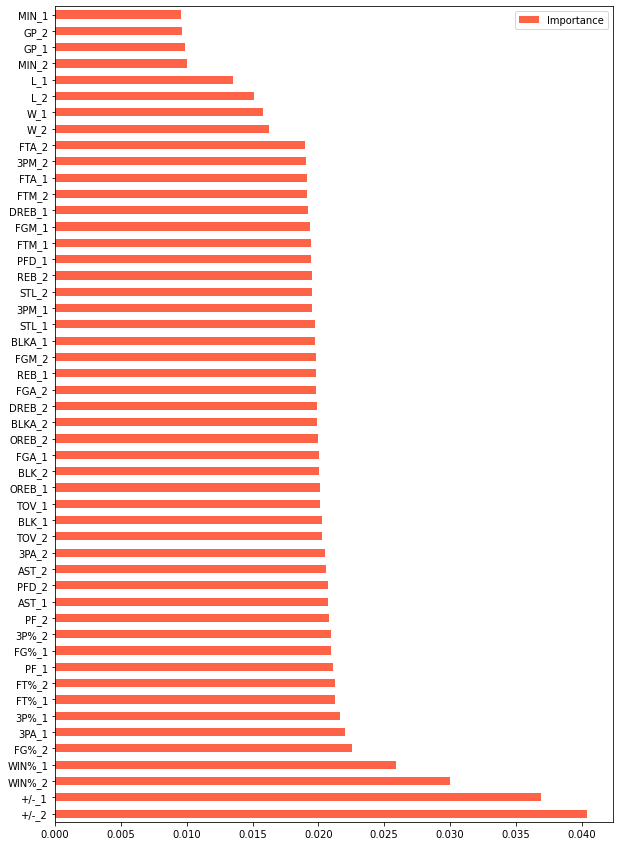

In [57]:
importance=pd.DataFrame(forest.feature_importances_,index=X_train.columns)
pd.DataFrame({'Importance' : forest.feature_importances_},index = X_train.columns).sort_values('Importance', ascending = False).plot.barh(color = 'tomato', figsize = (10, 15))

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6366071428571428


Confusion matrix: [[491 169]
 [238 222]]


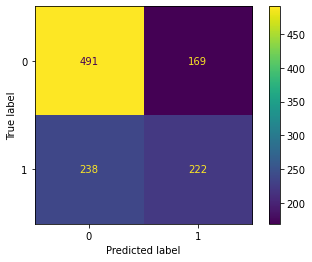

Nombre de vrais négatifs :  491
Nombre de vrais positifs :  222
Nombre de faux négatifs :  238
Nombre de faux positifs :  169


In [59]:
print("Confusion matrix:",metrics.confusion_matrix(y_test,predictions))
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,predictions))
disp.plot()
plt.show()
print('Nombre de vrais négatifs : ',metrics.confusion_matrix(y_test,predictions)[0][0])
print('Nombre de vrais positifs : ',metrics.confusion_matrix(y_test,predictions)[1][1])
print('Nombre de faux négatifs : ',metrics.confusion_matrix(y_test,predictions)[1][0])
print('Nombre de faux positifs : ',metrics.confusion_matrix(y_test,predictions)[0][1])

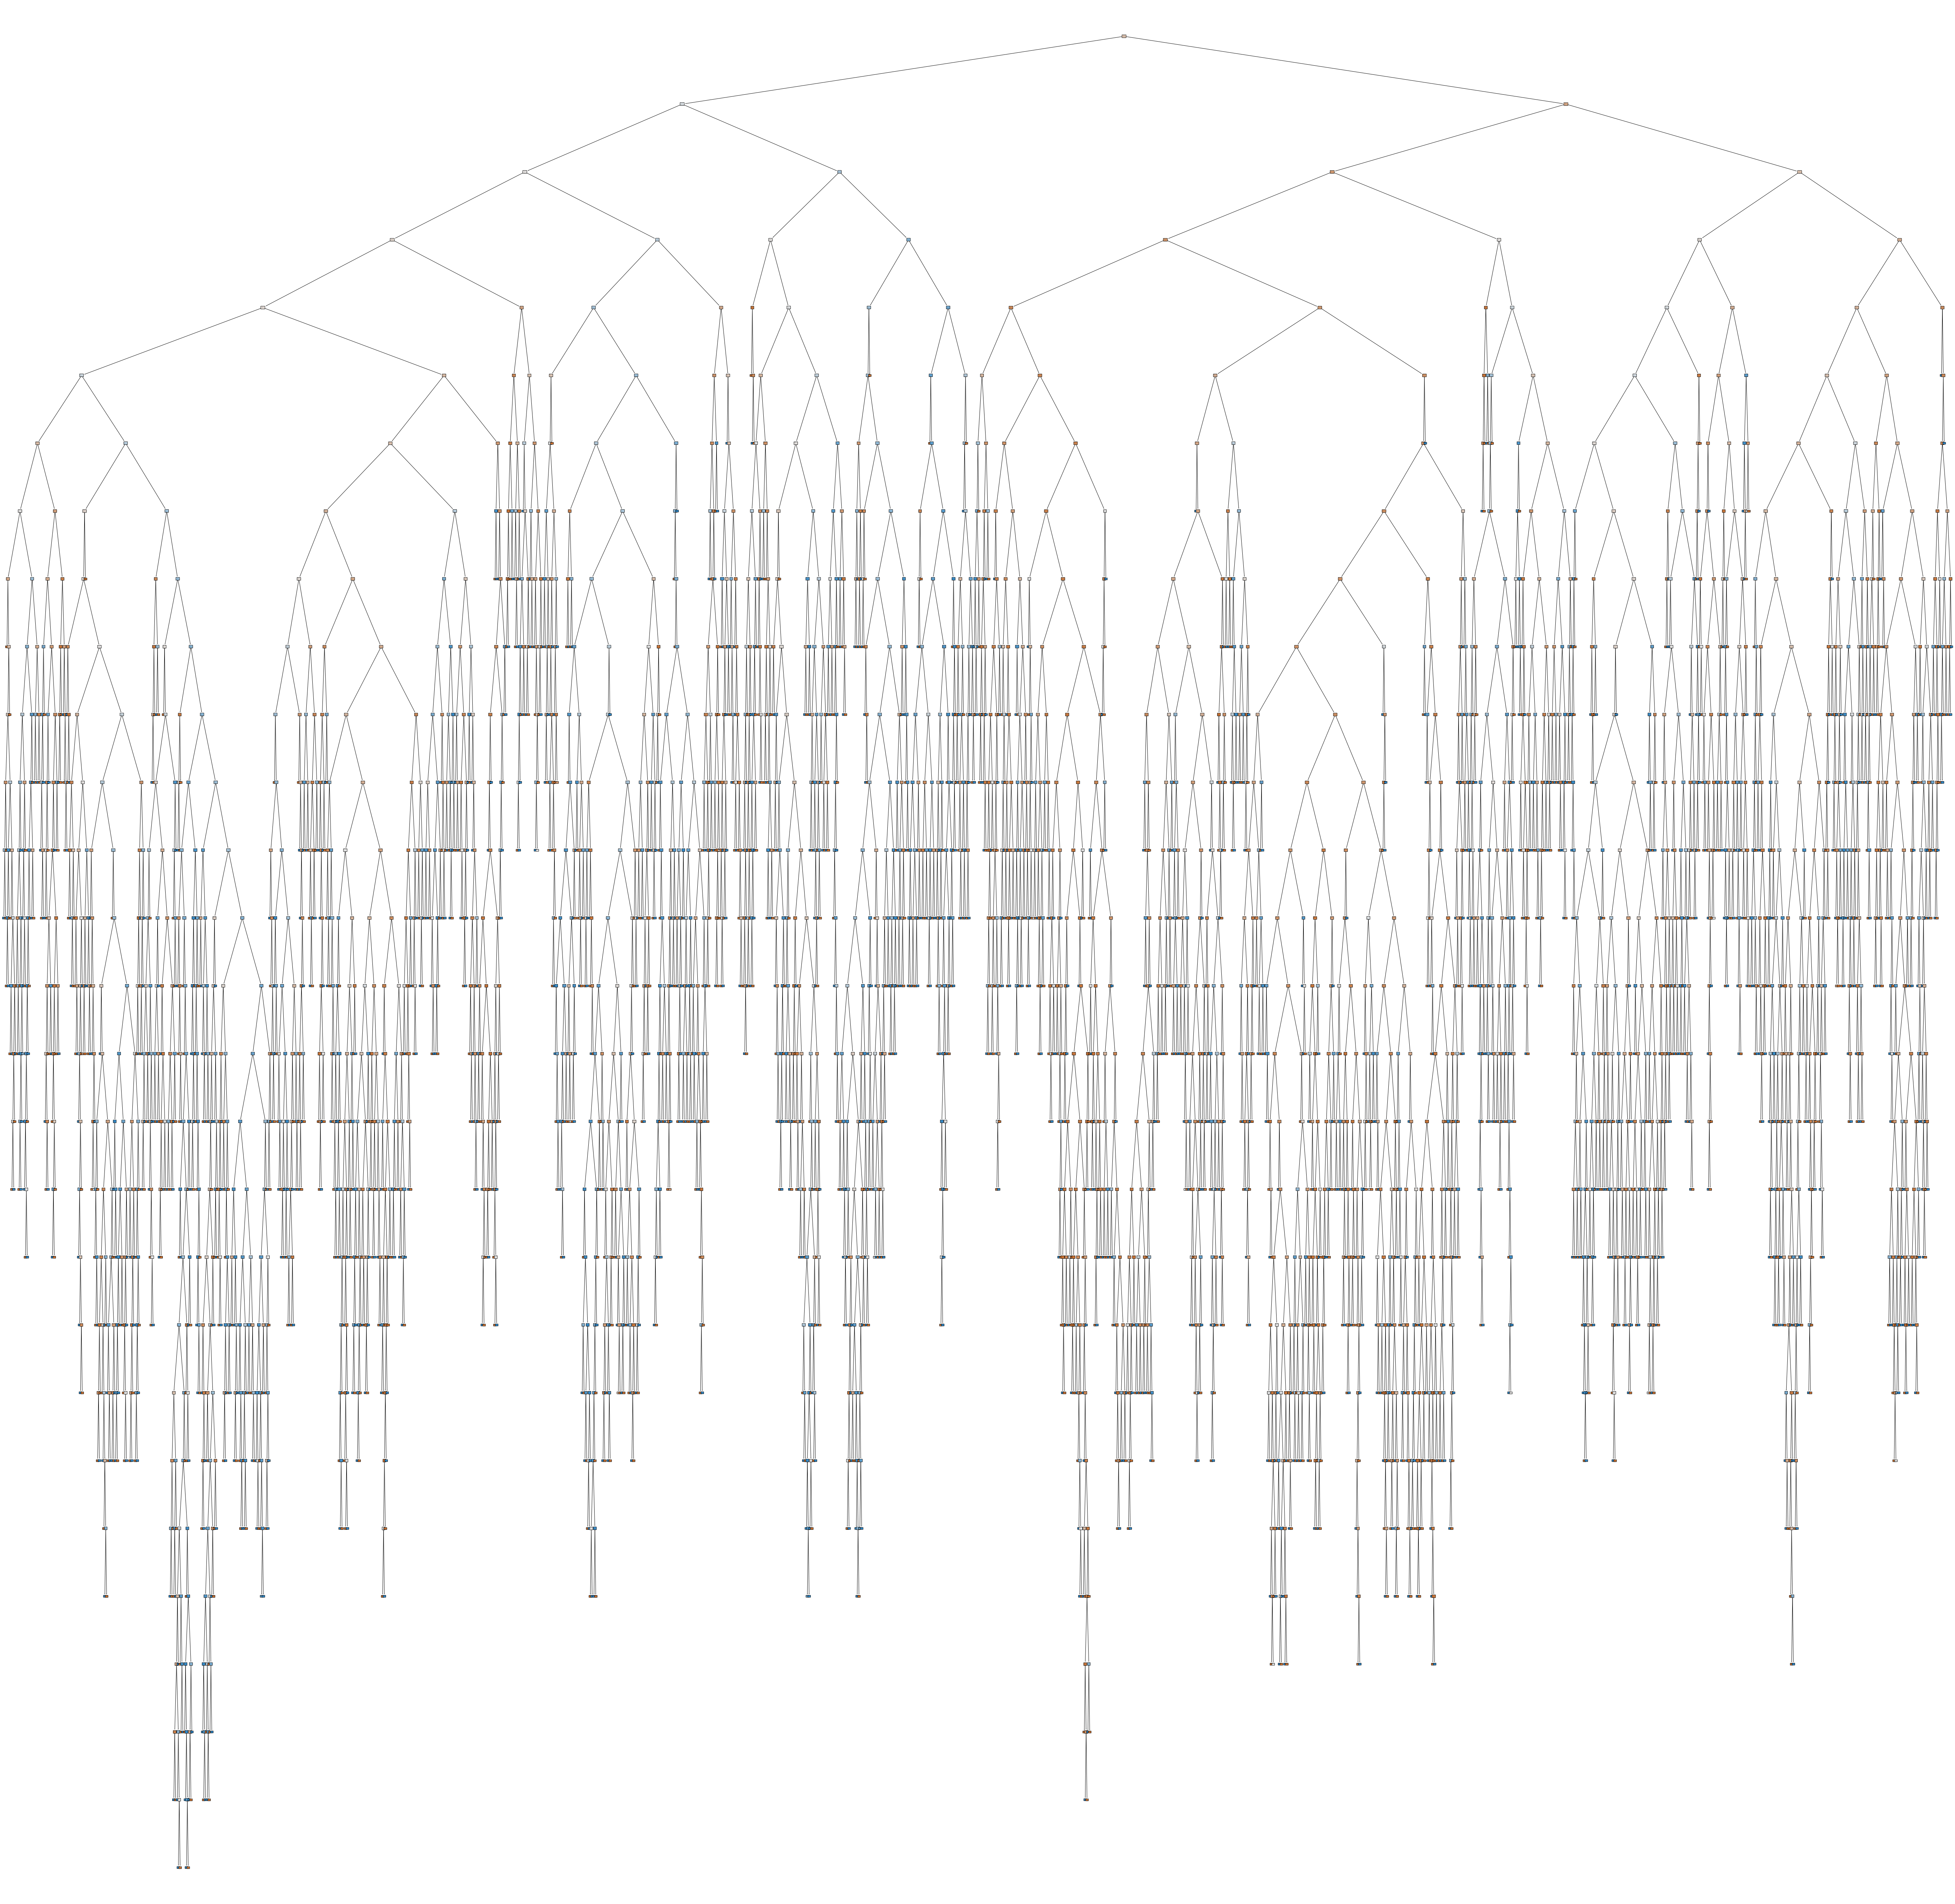

In [46]:
fig = plt.figure(figsize=(100, 100))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=str(df_1['Victory_V'].unique()), 
          filled=True, rounded=True)

plt.show()

## Second modèle

In [60]:
df_2=pd.concat([df_train_2, df_test_2])
df_2=df_2.reset_index(drop=True)
X=df_2.drop('Victory_V', axis=1)
y=df_2['Victory_V']

In [61]:
X_train,y_train=df_train_2.drop('Victory_V',axis=1),df_train_2[['Victory_V']]
X_test,y_test=df_test_2.drop('Victory_V',axis=1),df_test_2[['Victory_V']]

In [62]:
forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

<ipython-input-62-f5567bad764d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = forest.fit(X_train,y_train)


<AxesSubplot:>

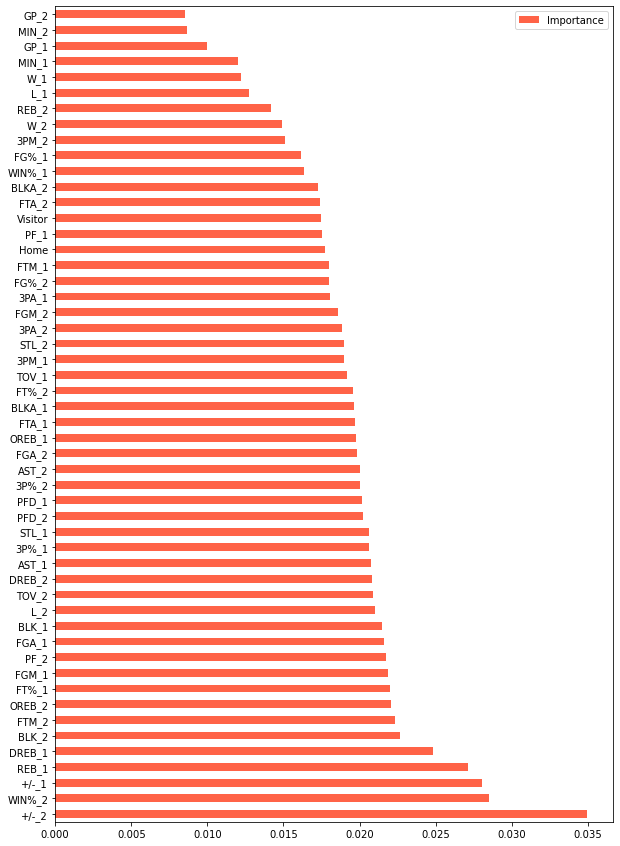

In [63]:
importance=pd.DataFrame(forest.feature_importances_,index=X_train.columns)
pd.DataFrame({'Importance' : forest.feature_importances_},index = X_train.columns).sort_values('Importance', ascending = False).plot.barh(color = 'tomato', figsize = (10, 15))

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.5921908893709328


Confusion matrix: [[213  54]
 [134  60]]


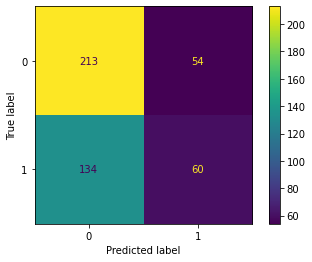

Nombre de vrais négatifs :  213
Nombre de vrais positifs :  60
Nombre de faux négatifs :  134
Nombre de faux positifs :  54


In [65]:
print("Confusion matrix:",metrics.confusion_matrix(y_test,predictions))
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,predictions))
disp.plot()
plt.show()
print('Nombre de vrais négatifs : ',metrics.confusion_matrix(y_test,predictions)[0][0])
print('Nombre de vrais positifs : ',metrics.confusion_matrix(y_test,predictions)[1][1])
print('Nombre de faux négatifs : ',metrics.confusion_matrix(y_test,predictions)[1][0])
print('Nombre de faux positifs : ',metrics.confusion_matrix(y_test,predictions)[0][1])

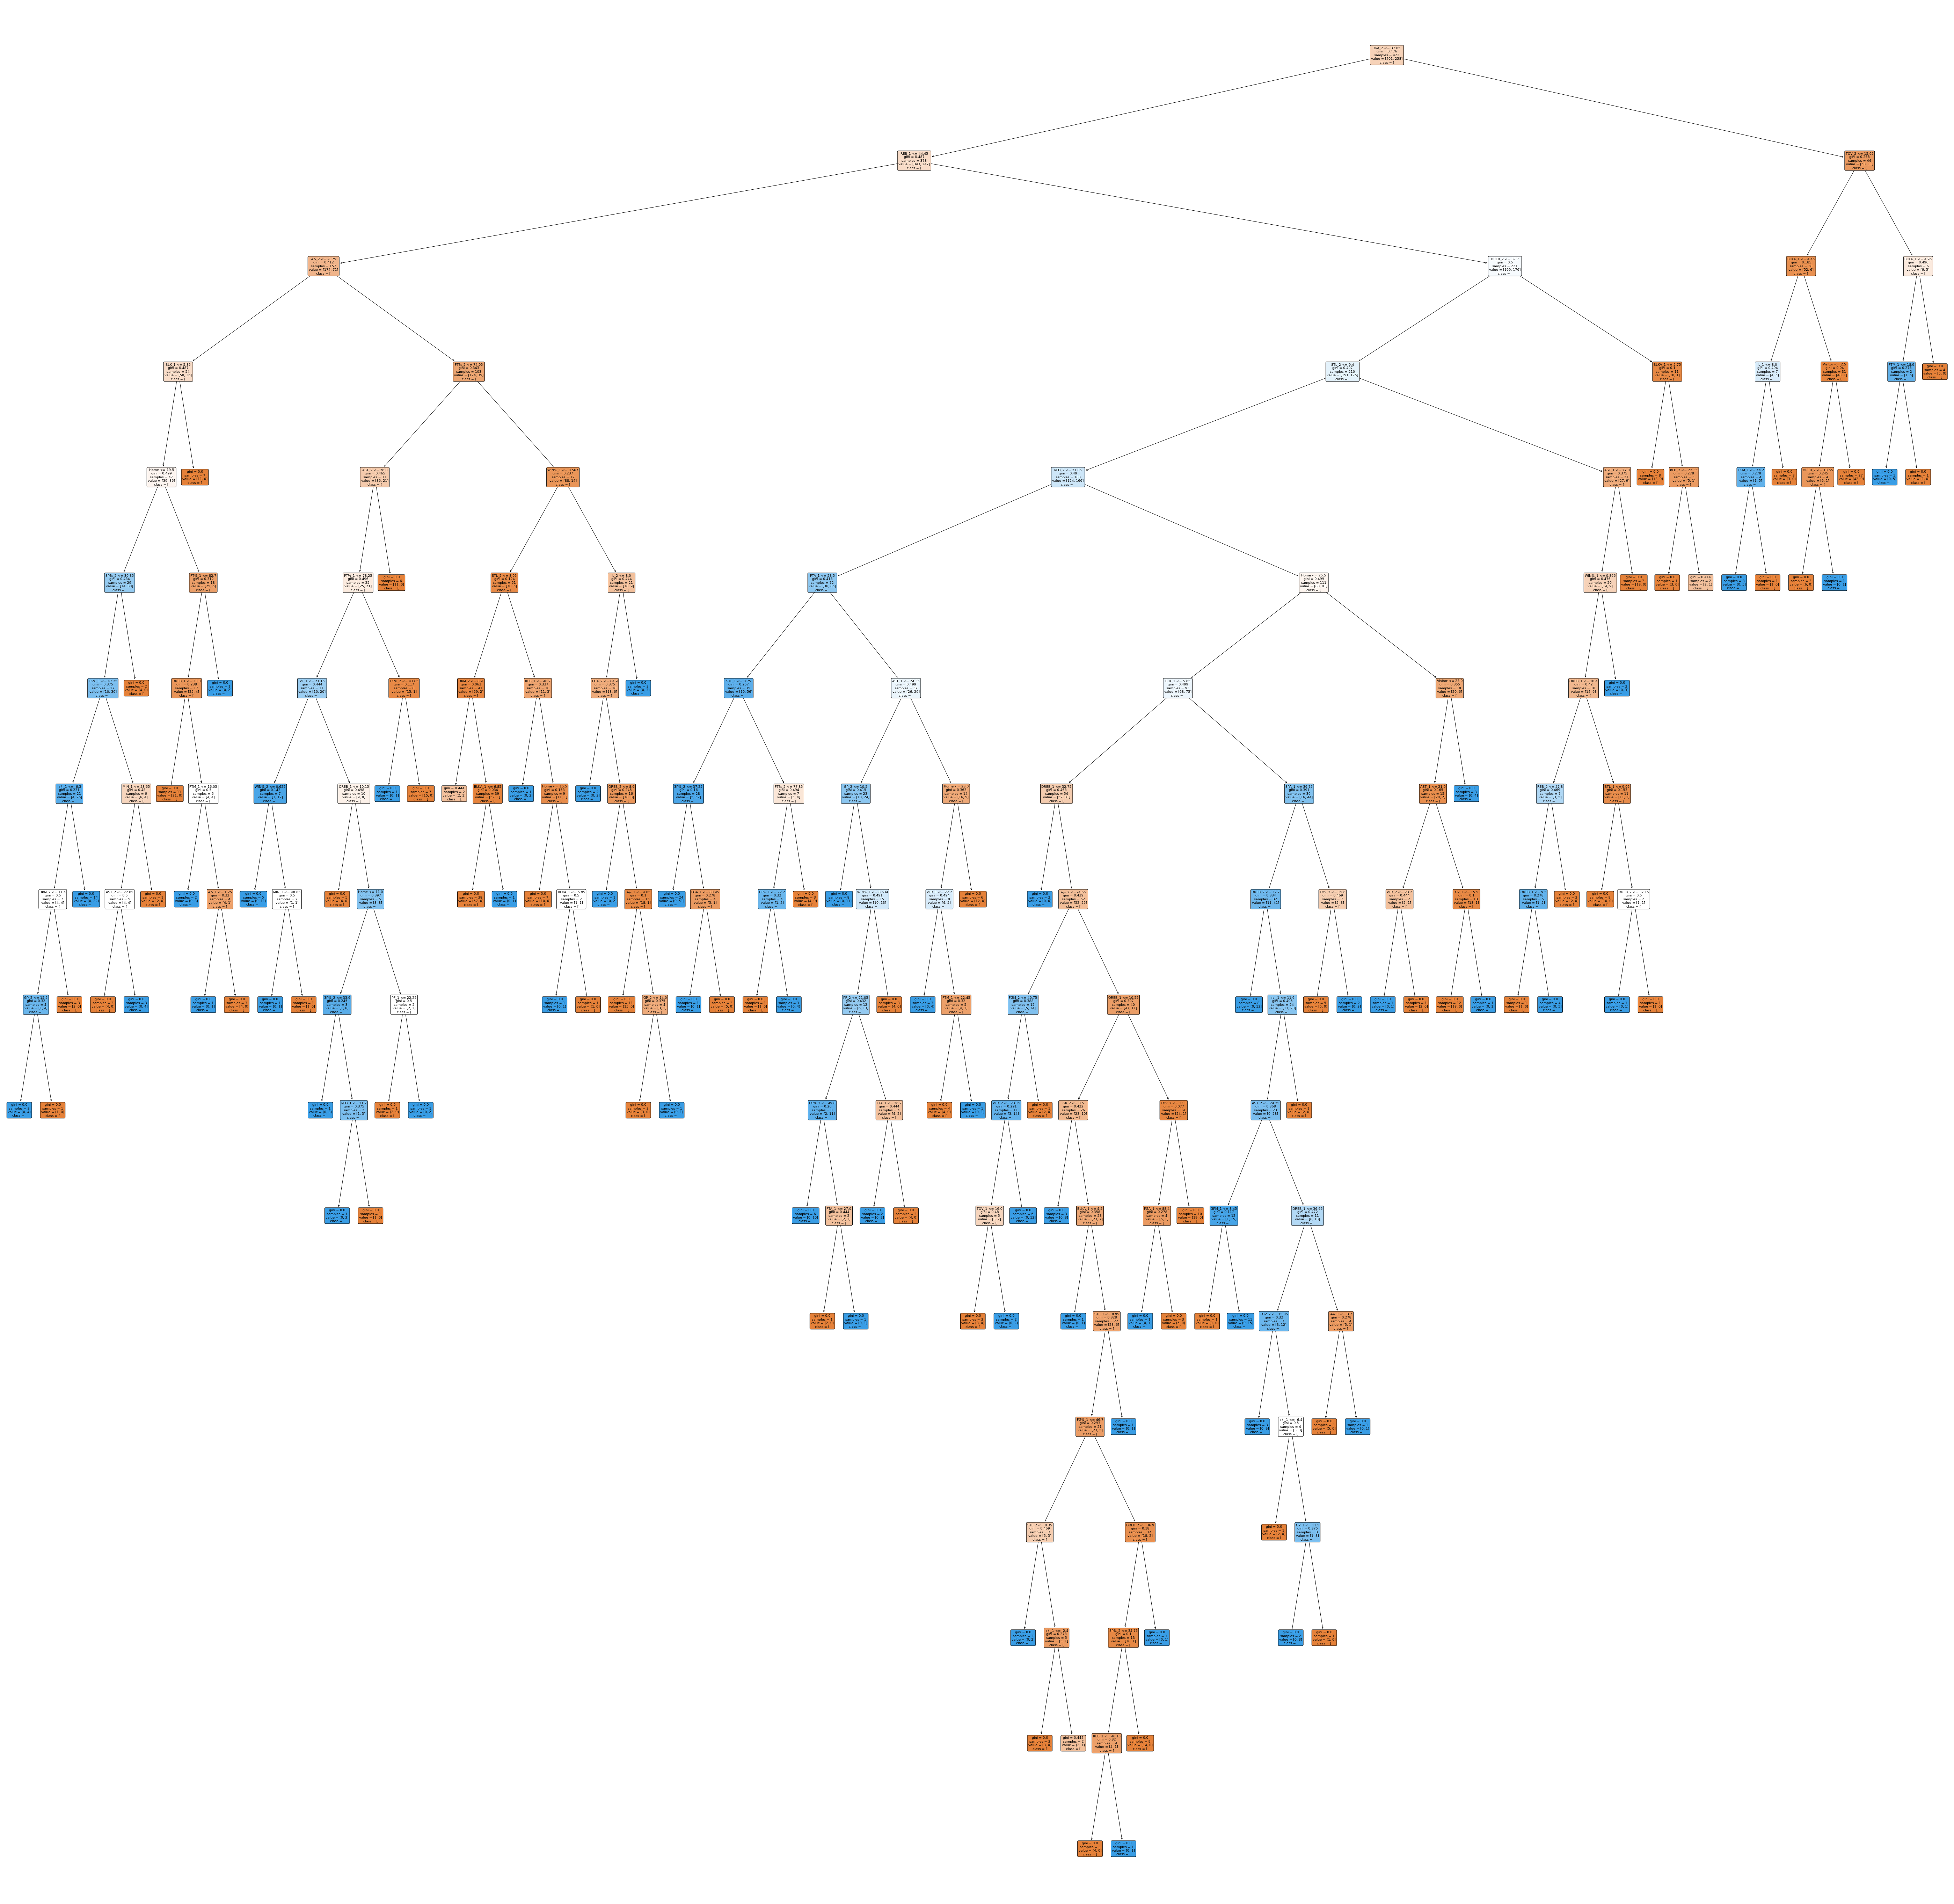

In [66]:
fig = plt.figure(figsize=(100, 100))
plot_tree(forest.estimators_[0], 
          feature_names=X.columns,
          class_names=str(df_1['Victory_V'].unique()), 
          filled=True, rounded=True)

plt.show()